# This file runs on ***Google Colab***
## Before running this file, the Data File needs to be placed at the same level as this file

### Data file: ../PySpark_DataFile/data_ready_for_PySpark_NLP.zip/data_ready_for_PySpark_NLP.csv


In [1]:
# Import our dependencies
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [2]:
# Reading data into a pandas DataFrame
df = pd.read_csv('data_ready_for_PySpark_NLP.csv')
df

,Review,Reviewer_Score
0,I am so angry that i made this post available...,2.9
1,No real complaints the hotel was great great ...,7.5
2,Rooms are nice but for elderly a bit difficul...,7.1
3,My room was dirty and I was afraid to walk ba...,3.8
4,You When I booked with your company on line y...,6.7
...,...,...
512338,no trolly or staff to help you take the lugga...,7.0
512339,The hotel looks like 3 but surely not 4 Brea...,5.8
512340,The ac was useless It was a hot week in vienn...,2.5
512341,The rooms are enormous and really comfortable...,8.8


In [3]:
# Split our preprocessed data into our features/input and target/output arrays
y = df['Reviewer_Score'].values
X = df.drop(['Reviewer_Score'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [4]:
# Compile, Train and Evaluate the Model
model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(model, output_shape=[8], input_shape=[], dtype=tf.string, trainable=True)
model = tf.keras.Sequential()

# First hidden layer
model.add(hub_layer)

# Second hidden layer
model.add(tf.keras.layers.Dense(units=3, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 3)                 63        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 400,087
Trainable params: 400,087
Non-trainable params: 0
_________________________________________________________________


In [5]:
# compile the model
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [6]:
# Fit/Train the model
fit_model = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
12009/12009 [==============================] - 134s 11ms/step - loss: -7.0715 - accuracy: 0.0000e+00
Epoch 2/10
12009/12009 [==============================] - 135s 11ms/step - loss: -7.0823 - accuracy: 0.0000e+00
Epoch 3/10
12009/12009 [==============================] - 135s 11ms/step - loss: -7.0823 - accuracy: 0.0000e+00
Epoch 4/10
12009/12009 [==============================] - 134s 11ms/step - loss: -7.0823 - accuracy: 0.0000e+00
Epoch 5/10
12009/12009 [==============================] - 134s 11ms/step - loss: -7.0823 - accuracy: 0.0000e+00
Epoch 6/10
12009/12009 [==============================] - 133s 11ms/step - loss: -7.0823 - accuracy: 0.0000e+00
Epoch 7/10
12009/12009 [==============================] - 132s 11ms/step - loss: -7.0823 - accuracy: 0.0000e+00
Epoch 8/10
12009/12009 [==============================] - 134s 11ms/step - loss: -7.0823 - accuracy: 0.0000e+00
Epoch 9/10
12009/12009 [==============================] - 134s 11ms/step - loss: -7.0823 - accuracy: 0.0

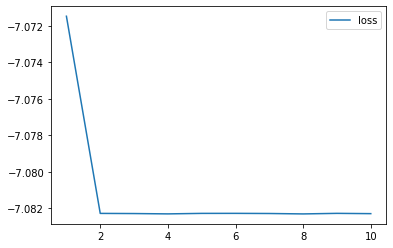

In [7]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

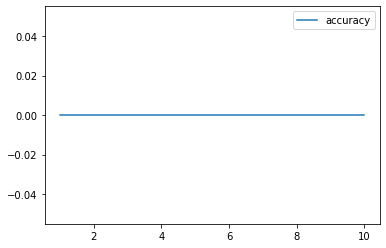

In [8]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [9]:
# Test/Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4003/4003 - 8s - loss: -7.0830e+00 - accuracy: 0.0000e+00
Loss: -7.083003997802734, Accuracy: 0.0


In [10]:
# Export our model to HDF5 file
model.save("SavedModel1_NLP_DL_Review_in_Decimal_Format.h5")